---

# Library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, classification_report
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
import time

I will using both the adult.data and adult.test to combine into one big adult database before doing train_test_split

# I. Read Data

In [2]:
columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
           "marital-status", "occupation", "relationship", "race", "sex", 
           "capital-gain", "capital-loss", "hours-per-week", "native-country","income"]

In [3]:
adult_data = pd.read_csv("adult.data", names=columns, sep=",", index_col=False, skipinitialspace=True)
adult_data['income'] = adult_data['income'].str.replace('.', '', regex=False).str.strip()
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
adult_test = pd.read_csv("adult.test", names=columns, sep=",", index_col=False, skipinitialspace=True,skiprows=[0])
adult_test['income'] = adult_test['income'].str.replace('.', '', regex=False).str.strip()
adult_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adult_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [7]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [9]:
adult = pd.concat([adult_test,adult_data])
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# II. Data Cleaning

In [11]:
missing_counts = (adult == "?").sum()
duplicate_count = adult.duplicated().sum()
print("Number of missing values:")
print(missing_counts)
print("\nNumber of duplicate rows:", duplicate_count)

Number of missing values:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

Number of duplicate rows: 52


In [12]:
total_rows = adult.shape[0]
missing_percentage = (missing_counts / total_rows) * 100
missing_percentage

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64

After checking for missing values, we found that they are present in workclass, occupation, and native-country. Since these missing values make up only a small portion of the dataset (approximately 6% for workclass and occupation, and 2% for native-country), we can safely discard the affected rows.

In [13]:
adult.replace("?", np.nan, inplace=True)
adult= adult.dropna()

There're 25 duplicated rows in the database. So we only keep the first one and delete the rest of the duplicated ones

In [14]:
adult = adult.drop_duplicates()

# III. Exploratory Data Analysis

### 1.What is the overall distribution of income?

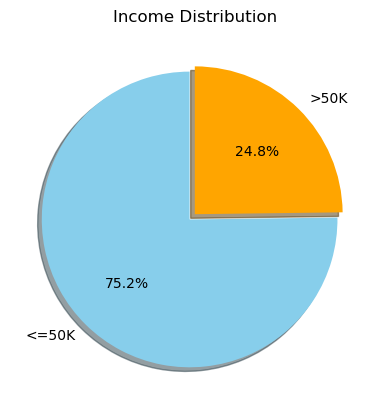

In [16]:
income_counts = adult['income'].value_counts()
income_counts.plot(
    kind='pie',
    autopct='%1.1f%%',  
    startangle=90,      
    colors=['skyblue','orange'],
    explode=(0.05, 0), 
    shadow=True
)

plt.title("Income Distribution")
plt.ylabel("")  
plt.show()

According to this chart, around 75% of adults in the dataset have an income of $50k or less, while those earning more than $50k account for almost 25%.

### 2.Does age affect income level?

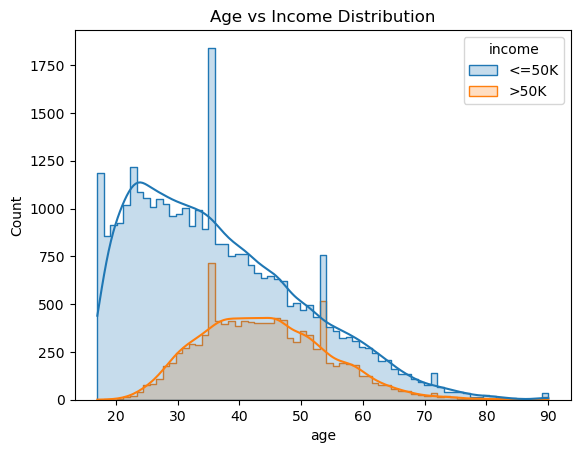

In [19]:
sns.histplot(data=adult, x="age", hue="income", kde=True, element="step")
plt.title("Age vs Income Distribution")
plt.show()


The majority of individuals earning $50k or less are concentrated between the ages of roughly 20 and 45, with a peak around the late 20s to early 30s. In contrast, individuals earning more than $50k are more evenly distributed between their early 30s and mid-50s, peaking around the early 40s. The count of high-income individuals remains lower than that of lower-income individuals across all age groups, indicating that a greater proportion of the population falls into the ≤$50k income category.

### 3.How does education level impact income?

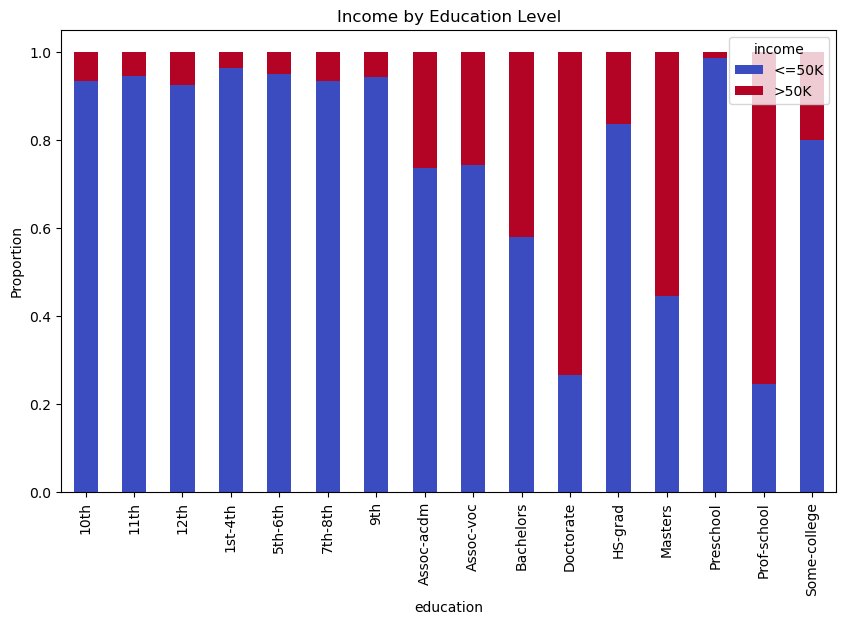

In [20]:
edu_income = pd.crosstab(adult['education'], adult['income'], normalize='index')
edu_income.plot(kind='bar', stacked=True, figsize=(10,6), colormap="coolwarm")
plt.title("Income by Education Level")
plt.ylabel("Proportion")
plt.show()

Higher levels of education are strongly associated with higher income, with advanced degrees like Doctorate and Professional School showing a majority of individuals earning over $50k.
In contrast, those with lower education levels overwhelmingly fall into the ≤$50k income category.

### 4.Which occupations have the highest proportion of >50K earners?

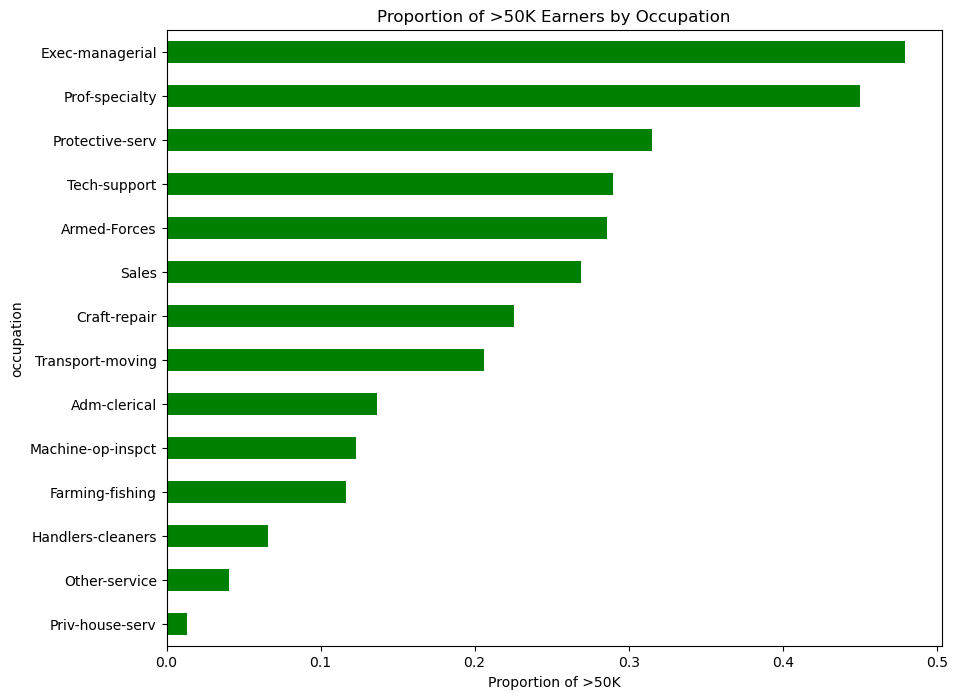

In [22]:
occupation_income = pd.crosstab(adult['occupation'], adult['income'], normalize='index')
occupation_income['>50K'].sort_values().plot(kind='barh', figsize=(10,8), color='green')
plt.title("Proportion of >50K Earners by Occupation")
plt.xlabel("Proportion of >50K")
plt.show()

Executive and professional specialty occupations have the highest proportion of individuals earning over $50k, while roles such as private household service, other service, and handlers-cleaners have the lowest proportions.
This suggests a strong link between occupation type and likelihood of higher income.

### 5.What about the gender pay gap?

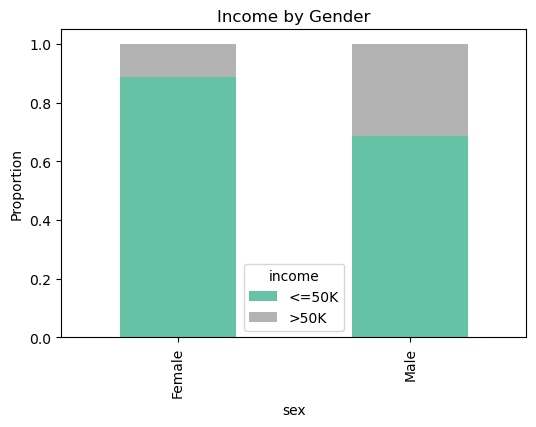

In [26]:
gender_income = pd.crosstab(adult['sex'], adult['income'], normalize='index')
gender_income.plot(kind='bar', stacked=True, figsize=(6,4), colormap="Set2")
plt.title("Income by Gender")
plt.ylabel("Proportion")
plt.show()

Males have a noticeably higher proportion of individuals earning over $50k compared to females, while the majority of females fall into the ≤$50k income category.
This indicates a gender disparity in income distribution.

# IV. Features Selection

To assess how informative each attribute is to the dataset, I will calculate the correlation of numeric features with the Income column first

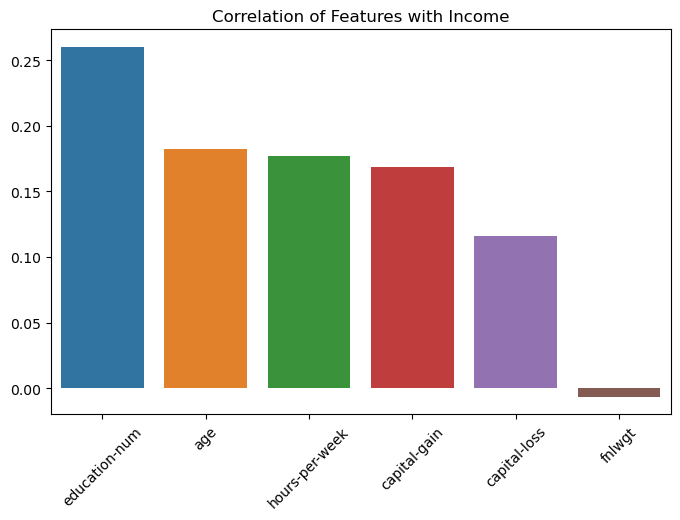

In [14]:
adult["income"] = adult["income"].astype(str)
adult["income"] = adult["income"].apply(lambda x: 1 if x.strip() == ">50K" else 0)

numeric_data = adult.select_dtypes(include=["number"])
correlation = numeric_data.corr()["income"].drop("income").sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=45)
plt.title("Correlation of Features with Income")
plt.show()

We can see fnlwgt has a low correlation with income so we can drop it out of the database

In [15]:
adult.drop(columns="fnlwgt",inplace=True)

Next, we will calculate the correlation between categorical features and the Income column. Note that we are excluding native-country because it has too many unique categories, which results in a weak effect on income.

In [16]:
print(adult.groupby("sex")["income"].mean().sort_values()) 

sex
Female    0.075724
Male      0.209578
Name: income, dtype: float64


In [17]:
print(adult.groupby("race")["income"].mean().sort_values()) 

race
Other                 0.059490
Amer-Indian-Eskimo    0.078161
Black                 0.086586
White                 0.175862
Asian-Pac-Islander    0.190476
Name: income, dtype: float64


In [18]:
print(adult.groupby("marital-status")["income"].mean().sort_values())

marital-status
Never-married            0.032236
Separated                0.046775
Married-spouse-absent    0.056159
Widowed                  0.062647
Divorced                 0.071814
Married-civ-spouse       0.303924
Married-AF-spouse        0.312500
Name: income, dtype: float64


In [19]:
print(adult.groupby("relationship")["income"].mean().sort_values())

relationship
Own-child         0.009666
Other-relative    0.025945
Unmarried         0.044496
Not-in-family     0.070420
Husband           0.304250
Wife              0.331899
Name: income, dtype: float64


After calculating the correlations, we will keep relationship, marital-status, and sex because there is a noticeable gap between categories. In contrast, the race column does not show significant differences.

In [20]:
adult.drop(columns=["race","native-country"],inplace=True)

We use VIF to detect multicollinearity and remove redundant features. A high VIF indicates strong correlation with other variables, meaning the feature adds little unique information.

In [21]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

def remove_high_vif_features(df, threshold=10):
    df = df.copy() 
    dropped_features = [] 

    while True:
        vif_data = calculate_vif(df)
        
        max_vif = vif_data["VIF"].max()
        if max_vif < threshold:
            break  
        
        feature_to_drop = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Dropping {feature_to_drop} (VIF={max_vif:.2f})")
        df.drop(columns=[feature_to_drop], inplace=True)
        dropped_features.append(feature_to_drop)
    
    return df, dropped_features

numeric_features = adult.select_dtypes(include=["number"]).drop(columns=["income"], errors="ignore")
filtered_data, dropped_columns = remove_high_vif_features(numeric_features)

adult.drop(columns=dropped_columns, inplace=True)

print("Final VIF Values:")
print(calculate_vif(filtered_data).sort_values(by="VIF", ascending=False))

Dropping education-num (VIF=10.63)
Final VIF Values:
          Feature       VIF
0             age  6.310183
3  hours-per-week  6.306693
2    capital-loss  1.055064
1    capital-gain  1.030013


# V. Data Normalization

We will use Min-Max scaling for age and hours-per-week since they have different scales compared to other features. Meanwhile, we will apply a log transformation to capital-gain and capital-loss due to their skewed distributions.

In [22]:
columns_to_minmax = ['age', 'hours-per-week'] 
columns_to_log = ['capital-gain', 'capital-loss']

In [23]:
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

for col in columns_to_minmax:
    adult[col + '_minmax'] = min_max_scaling(adult[col])

def log_transform(column):
    return np.log1p(column)

for col in columns_to_log:
    adult[col + '_log'] = log_transform(adult[col])

adult.describe()

,age,capital-gain,capital-loss,hours-per-week,income,age_minmax,hours-per-week_minmax,capital-gain_log,capital-loss_log
count,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000
mean,38.551755,1102.112736,88.650308,40.941209,0.166084,0.295230,0.407563,0.741218,0.355709
std,13.215806,7508.705003,405.075515,12.006449,0.372160,0.181038,0.122515,2.467222,1.596383
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000,0.150685,0.397959,0.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000,0.273973,0.397959,0.000000,0.000000
75%,47.000000,0.000000,0.000000,45.000000,0.000000,0.410959,0.448980,0.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,11.512925,8.379539


# VI. Train-test splitting

Before splitting into training and test data, I will apply one-hot encoding to the remaining categorical columns.

In [ ]:
categorical =["workclass","education","marital-status","occupation","relationship","sex"]
adult = pd.get_dummies(adult, drop_first=True, columns = categorical)

Now, we will split the Adult dataset into training and testing data, with the test size set to 30%. You don’t need to choose a specific number for the random_state; just pick one to ensure consistency each time you run the code. Also, make sure to enable shuffling.

In [26]:
X = adult.drop(columns=["income"])  
y = adult["income"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

Before training I want to check if the our train and test data are class imbalance

In [46]:
print("Y_train with 0: ",y_train.value_counts()[0])
print("Y_train with 1: ",y_train.value_counts()[1])
print("Y_test with 0: ",y_test.value_counts()[0])
print("Y_test with 1: ",y_test.value_counts()[1])

Y_train with 0:  26345
Y_train with 1:  5290
Y_test with 0:  11343
Y_test with 1:  2216


As you can see, there's class imbalance, but it can't be helped since the total ratio between 0 and 1 is so large that it will always cause class imbalance, no matter how large the test size is. Even so, we will continue with the test to see how the models perform with this class imbalance.

# VII. Classification algorithms & Evaluations

Since some models, like SVM or MLP, can take a long time (usually hours) to find the best parameters using GridSearchCV, in this case I will select randomly two models for SVM and MLP to test, while for the others, I will use GridSearchCV to find the best parameters.

## 7.1 Decision tree

For the Decision Tree, I will use GridSearchCV to tune the max_depth and criterion parameters

Best Parameters: {'criterion': 'gini', 'max_depth': 5}

--- Evaluation Metrics ---
Accuracy: 0.8540
Precision: 0.5993
Recall (Sensitivity): 0.3227
Specificity (True Negative Rate): 0.9579
F1 Score: 0.4195
AUC Score: 0.8323

--- Runtime ---
Training time: 2.11 seconds
Evaluation time: 0.04 seconds
Total runtime: 2.14 seconds


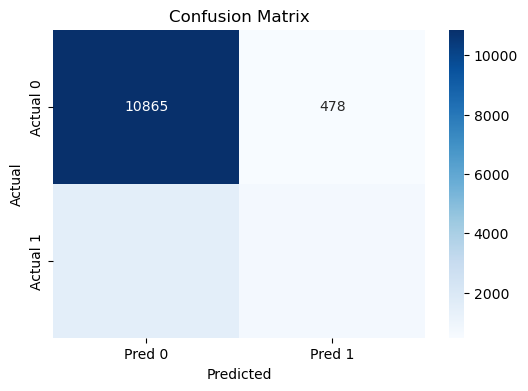

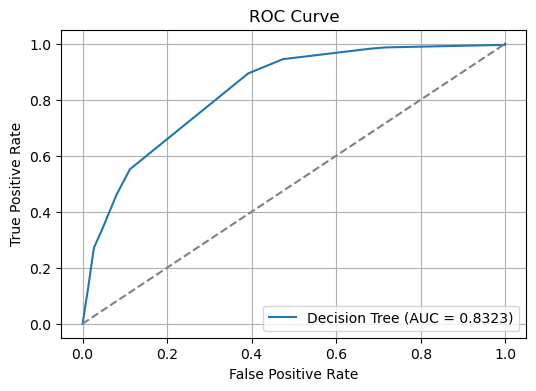

In [38]:
start_time = time.time()

dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

train_end_time = time.time()

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

end_time = time.time()

print(f"\n--- Evaluation Metrics ---")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

print(f"\n--- Runtime ---")
print(f"Training time: {train_end_time - start_time:.2f} seconds")
print(f"Evaluation time: {end_time - train_end_time:.2f} seconds")
print(f"Total runtime: {end_time - start_time:.2f} seconds")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 7.2 Ensemble Model: Random Forest

For the Random Forest, I will tune n_estimators, max_depth, criterion, max_features, and bootstrap.

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

--- Evaluation Metrics ---
Accuracy: 0.8585
Precision: 0.6627
Recall (Sensitivity): 0.2730
Specificity (True Negative Rate): 0.9728
F1 Score: 0.3867
AUC Score: 0.8719

--- Runtime ---
Training time: 188.31 seconds
Evaluation time: 0.42 seconds
Total runtime: 188.73 seconds


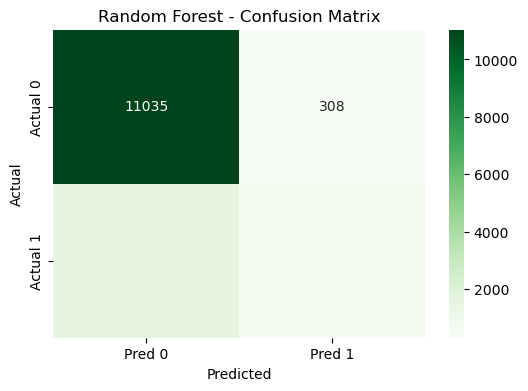

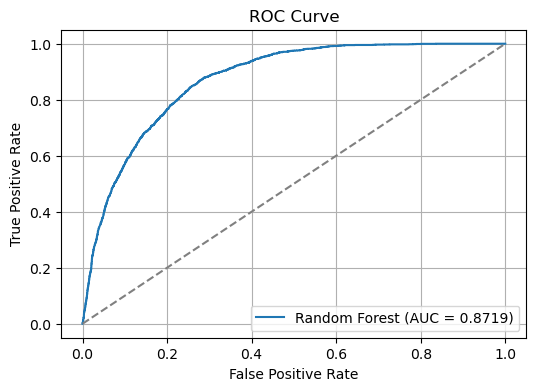

In [28]:
start_time = time.time()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

train_end_time = time.time()

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

end_time = time.time()

print(f"\n--- Evaluation Metrics ---")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

print(f"\n--- Runtime ---")
print(f"Training time: {train_end_time - start_time:.2f} seconds")
print(f"Evaluation time: {end_time - train_end_time:.2f} seconds")
print(f"Total runtime: {end_time - start_time:.2f} seconds")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 7.3 Naive Bayes

For Naive Bayes, I will use GaussianNB and tune the var_smoothing parameter.

Best Parameters: {'var_smoothing': 1e-07}

--- Evaluation Metrics ---
Accuracy: 0.8355
Precision: 0.4940
Recall (Sensitivity): 0.2622
Specificity (True Negative Rate): 0.9475
F1 Score: 0.3426
AUC Score: 0.7729

--- Runtime ---
Training time: 1.08 seconds
Evaluation time: 0.07 seconds
Total runtime: 1.15 seconds


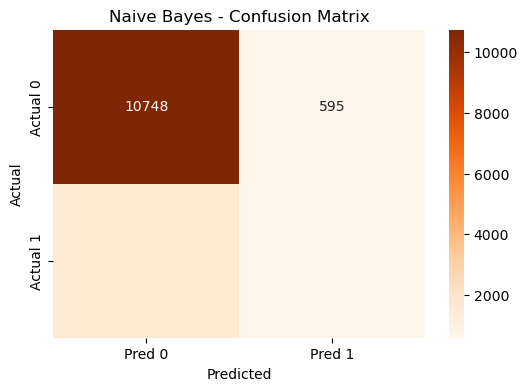

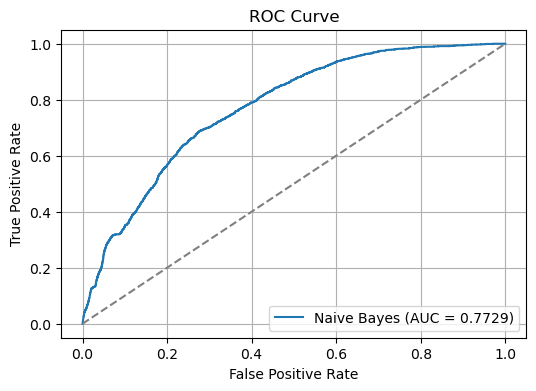

In [29]:
start_time = time.time()

gaussian_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}  
param_grid = gaussian_param_grid

nb_model = GaussianNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

train_end_time = time.time()

results = pd.DataFrame(grid_search.cv_results_)
results_df = results[['params', 'mean_test_score', 'mean_fit_time']]
results_df.to_csv("naive_bayes_results.csv", index=False)

best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

end_time = time.time()

print(f"\n--- Evaluation Metrics ---")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

print(f"\n--- Runtime ---")
print(f"Training time: {train_end_time - start_time:.2f} seconds")
print(f"Evaluation time: {end_time - train_end_time:.2f} seconds")
print(f"Total runtime: {end_time - start_time:.2f} seconds")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## 6.4 Support Vector Machine (SVM)


--- SVM (Linear) Metrics ---
Accuracy: 0.8467
Precision: 0.5708
Recall (Sensitivity): 0.2509
Specificity: 0.9631
F1 Score: 0.3486
AUC Score: 0.7879

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     11343
           1       0.57      0.25      0.35      2216

    accuracy                           0.85     13559
   macro avg       0.72      0.61      0.63     13559
weighted avg       0.82      0.85      0.82     13559



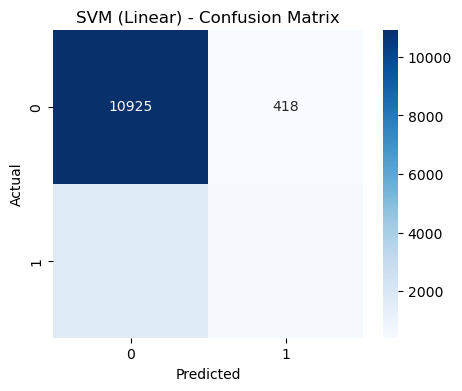

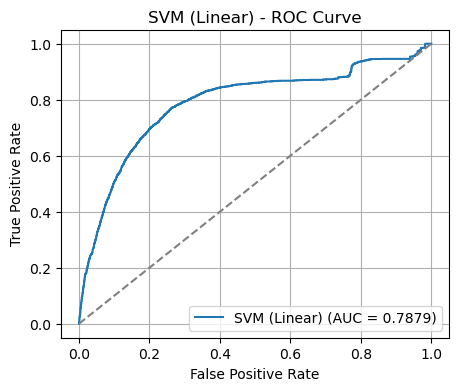

Linear SVM Runtime: 6710.11 seconds

--- SVM (RBF) Metrics ---
Accuracy: 0.8380
Precision: 0.5065
Recall (Sensitivity): 0.3317
Specificity: 0.9369
F1 Score: 0.4009
AUC Score: 0.7716

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11343
           1       0.51      0.33      0.40      2216

    accuracy                           0.84     13559
   macro avg       0.69      0.63      0.65     13559
weighted avg       0.82      0.84      0.82     13559



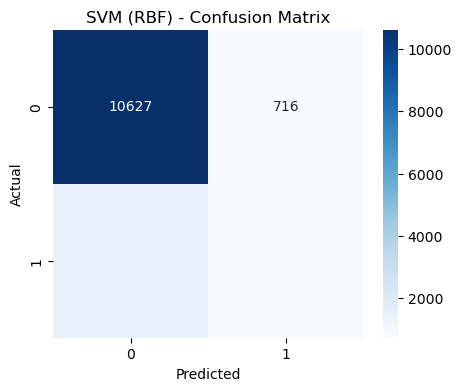

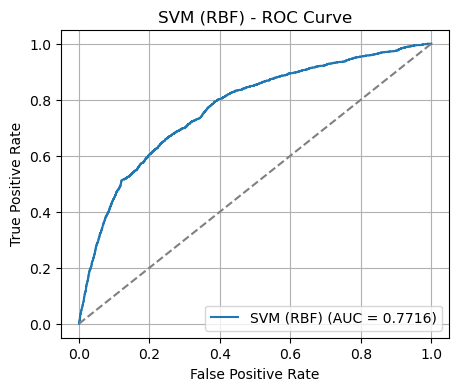

RBF SVM Runtime: 233.37 seconds


In [30]:
def evaluate_model(model, X_test, y_test, model_name="SVM"):
    y_pred = model.predict(X_test)
    y_prob = model.decision_function(X_test)  

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"\n--- {model_name} Metrics ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

start_linear = time.time()
linear_svm = SVC(kernel='linear', C=1.0, probability=False)
linear_svm.fit(X_train, y_train)
end_linear = time.time()
evaluate_model(linear_svm, X_test, y_test, model_name="SVM (Linear)")
print(f"Linear SVM Runtime: {end_linear - start_linear:.2f} seconds")

start_rbf = time.time()
rbf_svm = SVC(kernel='rbf', C=10, gamma=0.1, probability=False)
rbf_svm.fit(X_train, y_train)
end_rbf = time.time()
evaluate_model(rbf_svm, X_test, y_test, model_name="SVM (RBF)")
print(f"RBF SVM Runtime: {end_rbf - start_rbf:.2f} seconds")

## 6.5 Neural Network: Multilayer Perceptron (MLP)


--- MLP (100, ReLU, 0.001) Metrics ---
Accuracy: 0.8380
Precision: 0.5291
Recall: 0.0821
Specificity: 0.9857
F1 Score: 0.1422
AUC Score: 0.6525

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     11343
           1       0.53      0.08      0.14      2216

    accuracy                           0.84     13559
   macro avg       0.69      0.53      0.53     13559
weighted avg       0.79      0.84      0.78     13559



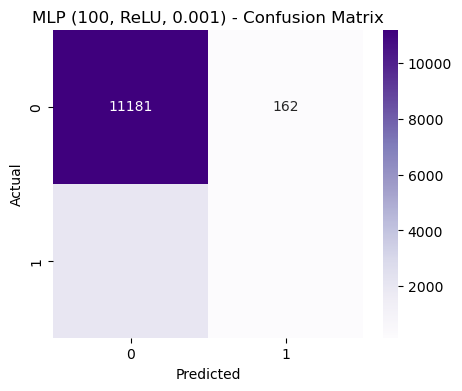

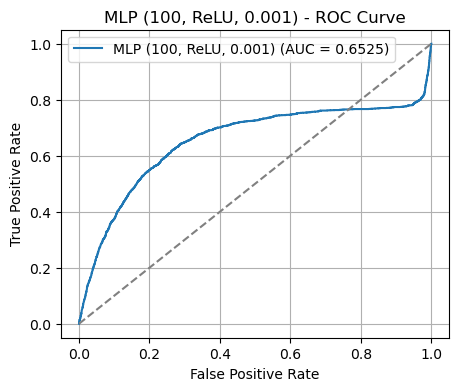

Runtime: 1.41 seconds

--- MLP (512,256, Tanh, 0.01) Metrics ---
Accuracy: 0.8044
Precision: 0.4250
Recall: 0.5578
Specificity: 0.8526
F1 Score: 0.4824
AUC Score: 0.8033

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     11343
           1       0.43      0.56      0.48      2216

    accuracy                           0.80     13559
   macro avg       0.67      0.71      0.68     13559
weighted avg       0.83      0.80      0.81     13559



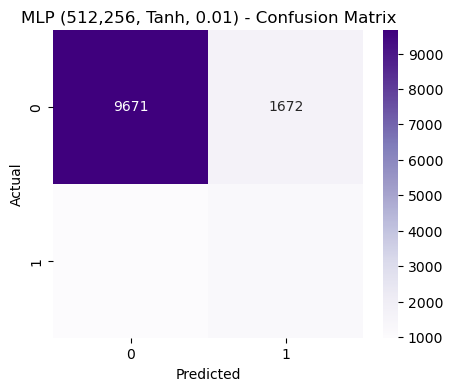

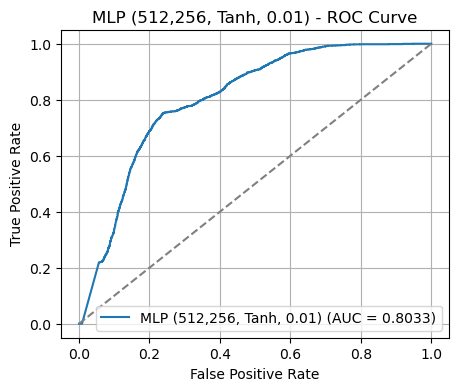

Runtime: 21.58 seconds


In [31]:
def evaluate_model(model, X_test, y_test, model_name="MLP"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"\n--- {model_name} Metrics ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

start_mlp1 = time.time()
mlp1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', learning_rate_init=0.001, max_iter=1000, random_state=42)
mlp1.fit(X_train, y_train)
end_mlp1 = time.time()
evaluate_model(mlp1, X_test, y_test, model_name="MLP (100, ReLU, 0.001)")
print(f"Runtime: {end_mlp1 - start_mlp1:.2f} seconds")

start_mlp2 = time.time()
mlp2 = MLPClassifier(hidden_layer_sizes=(512, 256), activation='tanh', learning_rate_init=0.01, max_iter=1000, random_state=42)
mlp2.fit(X_train, y_train)
end_mlp2 = time.time()
evaluate_model(mlp2, X_test, y_test, model_name="MLP (512,256, Tanh, 0.01)")
print(f"Runtime: {end_mlp2 - start_mlp2:.2f} seconds")

# VII. Comparison and Analysis

As we can see, all the models we tested have a very high accuracy score. However, when we look at the other metrics—precision, recall, and F1 score—we notice a significant difference compared to the accuracy score. This is because our training data, even after shuffling, is imbalanced: y_train contains 26,345 zero values and only 5,290 one values. This class imbalance makes the accuracy score essentially meaningless, as it does not reflect the model’s actual performance.

So we will analyze the performance between different models based on F1 score. We clearly see that:

1. **MLP (512,256, Tanh, 0.01)** (0.4824)   
2. **Decision tree** (0.4195)   
3. **SVM(RBF)** (0.4009)   
4. **Random forest** (0.3867)   
5. **SVM(Linear)** (0.3486)   
6. **Gaussian Naive Bayes** (0.3426)   
7. **MLP(100, ReLU, 0.001)** (0.1422)  

Based on the F1 scores, the MLP (512,256, Tanh, 0.01) model outperforms the others by a noticeable margin, suggesting it handles the class imbalance better than the rest. Traditional models like Decision Tree, SVM (RBF), and Random Forest also perform decently but lag behind. The MLP (100, ReLU, 0.001) shows significantly lower performance, indicating that model architecture and hyperparameters greatly impact the results in this imbalanced setting.

### Model Performance Comparison (AUC & F1 Score) 

| Model                          | AUC     | F1 Score | Remarks                                                                 |
|-------------------------------|---------|----------|-------------------------------------------------------------------------|
| MLP (512,256, Tanh, 0.01)     | 0.8033  | **0.4824** | Best overall: handles imbalance well with highest F1.                   |
| Decision Tree                 | 0.8323  | 0.4195   | Strong F1 and AUC — good candidate for imbalanced classification.       |
| SVM (RBF)                     | 0.7716  | 0.4009   | Performs decently; F1 suggests it's managing the minority class fairly. |
| Random Forest                 | **0.8719** | 0.3867   | Excellent AUC, but F1 reveals it's biased toward the majority class.    |
| SVM (Linear)                  | 0.7879  | 0.3486   | AUC is solid, but F1 could improve — may miss minority class cases.     |
| Naive Bayes                  | 0.7729  | 0.3426   | Lightweight, but struggles with imbalance.                              |
| MLP (100, ReLU, 0.001)        | 0.6525  | 0.1422   | Poor on both metrics — clearly underfitting and not handling imbalance. |

For the runtime comparison, Naive Bayes runs the fastest among all models, probably because it only has one hyperparameter to tune, whereas Random Forest and Decision Tree have more. SVM (Linear) takes 6710.11 seconds, which is the slowest among all the models, even with just one set of hyperparameters. Meanwhile, MLP (512, 256, Tanh, 0.01) takes 21.58 seconds to complete tuning, which is not too bad compared to SVM (Linear).

Overall, all models struggled to properly identify the minority class due to the significant imbalance, but through hyperparameter tuning, I learned how to optimize model performance.

# VIII. Reference

[How to tune a Decision Tree in Hyperparameter tuning - Geeksforgeeks](https://www.geeksforgeeks.org/how-to-tune-a-decision-tree-in-hyperparameter-tuning/)


[Tuning Random Forest with Grid Search - Train In Data](https://www.blog.trainindata.com/random-forest-with-grid-search/)


[Gaussian Naive Bayes with Hyperparameter Tuning - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/)


[Understanding SVM Hyperparameters - StackAbuse](https://stackabuse.com/understanding-svm-hyperparameters/)


[How to tune hyperparameters for better neural network performance - Medium](https://medium.com/codex/how-to-tune-hyperparameters-for-better-neural-network-performance-b8f542855d2e)
